# Homework Set Lecture 11: Optimization II

You may want to install `PuLP` for this problem set using:
* `pip install pulp`

**Unless expressly told not to, you may use functions and routines from the standard `Python` libraries. Make sure that you clearly indicate any libraries that you import. But also make sure that you understand what the function you are calling actually does.**

## Problem 1 (50 points):



Cash flow matching is a way to defease future liabilities (assuming interest rates are stationary). Consider the simple case of a startup that has the following expected cash flows:
* Month 0: -\$150 million
* Month 1: -\$100 million
* Month 2: \$200 million
* Month 3: -\$200 million
* Month 4:  \$50 million
* Month 5: \$300 million

After that, the founders believe that they will be in a continuous positive cash flow situation, but only if they survive the next five months.

Assume that at any time they can issue 3-month zero-coupon commercial paper with a 2% yield, they can borrow a month at a time from their credit line with 1% interest (per month), and they can invest cash in an interest-bearing account for one month at a time at 0.3% (per month).

How should the company finance these cash flows if they want to have no payment obligations at the end of the period? (**Hint**: This is an LP problem where you need to match the cash needs when there are negative cash flows using available cash from when there are positive cash flows combined with the various financing and investing options.)


Let x0,x1,x2,x3,x4 denote the value of money borrowed by the company each months.  
Let y0,y1,y2 denote the issuance of the three-months coupon each months.  
Let z0,z1,z2,z3,z4 denote the value of interest-bearing account each months.  


The net cash flow the whole period will be:
$$ -150+x_0+y_0-z_0 $$
$$ -100+x_1+y_1-z_1 \quad -1.01x_0 +1.003z_0 $$
$$  200+x_2+y_2-z_2 \quad -1.01x_1 +1.003z_1 $$
$$ -200+x_3-z_3 \quad -1.01x_2 +1.003z_2 -1.02y_0 $$
$$ 50+x_4-z_4 \quad -1.01x_3 +1.003z_3 -1.02y_1 $$
And all the cash flow need to be greater than or equal to zeros (constraints)


Then maximize the final output (cash flow at the final month)
$$ 300 \quad -1.01x_4 +1.003z_4 -1.02y_2 $$

In [6]:

# set up the cash flow
cf = [-150, -100, 200, -200, 50, 300]

# we need to keep all the cash flow non-negative, then maximize the final output at the end of the period:

In [3]:
from pulp import LpMaximize, LpProblem, LpStatus, lpSum, LpVariable

In [18]:
# Creates the 'prob' variable to contain the problem data
model = LpProblem(name="Simple-LP-problem",sense=LpMaximize)

# ---------------------
# VARIABLES
# ---------------------
x0 = LpVariable(name='Borrow-Month0', lowBound=0)
x1 = LpVariable(name='Borrow-Month1', lowBound=0)
x2 = LpVariable(name='Borrow-Month2', lowBound=0)
x3 = LpVariable(name='Borrow-Month3', lowBound=0)
x4 = LpVariable(name='Borrow-Month4', lowBound=0)
y0 = LpVariable(name='Bond-Month0', lowBound=0)
y1 = LpVariable(name='Bond-Month1', lowBound=0)
y2 = LpVariable(name='Bond-Month2', lowBound=0)
z0 = LpVariable(name='Invest-Month0', lowBound=0)
z1 = LpVariable(name='Invest-Month1', lowBound=0)
z2 = LpVariable(name='Invest-Month2', lowBound=0)
z3 = LpVariable(name='Invest-Month3', lowBound=0)
z4 = LpVariable(name='Invest-Month4', lowBound=0)

# ---------------------
# OBJECTIVE
# ---------------------
model += cf[-1] - 1.01*x4 -1.02*y2 +1.003*z4 

# ---------------------
# CONSTRAINTS
# ---------------------
model += (cf[0] +x0 +y0 -z0 >= 0 , 'Cash Flow Month 0')
model += (cf[1] +x1 +y1 -z1 -1.01* x0 + 1.003*z0 >= 0 , 'Cash Flow Month 1')
model += (cf[2] +x2 +y2 -z2 -1.01* x1 + 1.003*z1 >= 0 , 'Cash Flow Month 2')
model += (cf[3] +x3 -z3 -1.01* x2 + 1.003*z2 - 1.02*y0 >= 0 , 'Cash Flow Month 3')
model += (cf[4] +x4 -z4 -1.01* x3 + 1.003*z3 - 1.02*y1 >= 0 , 'Cash Flow Month 4')

In [19]:
status = model.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/anaconda3/lib/python3.9/site-packages/pulp/apis/../solverdir/cbc/osx/64/cbc /var/folders/d0/6cymk_pn0yl4bjbhkblw54bh0000gn/T/1db2c2bc3d404f0ab8f6515a6a0b3d88-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/d0/6cymk_pn0yl4bjbhkblw54bh0000gn/T/1db2c2bc3d404f0ab8f6515a6a0b3d88-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 10 COLUMNS
At line 37 RHS
At line 43 BOUNDS
At line 44 ENDATA
Problem MODEL has 5 rows, 13 columns and 23 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 5 (0) rows, 13 (0) columns and 23 (0) elements
0  Obj -0 Primal inf 450 (3) Dual inf 1.0029999 (1)
0  Obj -0 Primal inf 450 (3) Dual inf 4.006e+10 (6)
6  Obj -207.50305
Optimal - objective value -207.50305
Optimal objective -207.5030508 - 6 iterations time 0.002
Option for printingOptions changed from normal

In [20]:

# here is our net cash flow at Month 5, which is also our optimization obejective
print(f"Our final net cash flow at Month 5: {model.objective.value()}")

# following is our transaction each months
for var in model.variables():
    print(f"{var.name}: {var.value()}")


Our final net cash flow at Month 5: 92.4969528
Bond_Month0: 150.0
Bond_Month1: 49.019608
Bond_Month2: 203.43436
Borrow_Month0: 0.0
Borrow_Month1: 50.980392
Borrow_Month2: 0.0
Borrow_Month3: 0.0
Borrow_Month4: 0.0
Invest_Month0: 0.0
Invest_Month1: 0.0
Invest_Month2: 351.94417
Invest_Month3: 0.0
Invest_Month4: 0.0
Cash_Flow_Month_0: 0.0
Cash_Flow_Month_1: 0.0
Cash_Flow_Month_2: -5.920000020864791e-06
Cash_Flow_Month_3: 2.509999944777519e-06
Cash_Flow_Month_4: -1.5999999902760464e-07


Then we check the balance each month is non-negative, which is the constraints in our model   

In [21]:
 
for name, constraint in model.constraints.items():
    print(f"{name}: {constraint.value()}")

Cash_Flow_Month_0: 0.0
Cash_Flow_Month_1: 0.0
Cash_Flow_Month_2: -5.920000020864791e-06
Cash_Flow_Month_3: 2.509999944777519e-06
Cash_Flow_Month_4: -1.5999999902760464e-07


## Problem 2 (50 points):

In class there were (very) rough visualizations of the implied volatility surface using call options on Apple.

In this problem, we are interested in developing an improved 3-d representation of the vol surface. 

A. Construct the vol surface for Apple calls with a couple of improvements: (**10 points**)
* Instead of plotting against the raw strike price, plot against the log-strike.
* Instead of plotting against the date, plot against the **time** to expiry.

B. Construct the vol surface for Apple puts also. (**10 points**)

C. Generate a smooth vol surface for either puts or calls (or a combination?). (Hint, you may want to smooth the volatilities before plotting). (**30 points**)

**You do not need to use the same 3-d plotting function used in the lecture notes.**

In [29]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import MaxNLocator
%matplotlib inline

In [110]:
def get_options(ticker):
    import pandas as pd
    import yfinance as yf
    
    # get the data for the ticker from Yahoo
    optionTicker= yf.Ticker(ticker)

    # initialize DataFrames
    callOptions = pd.DataFrame()
    putOptions = pd.DataFrame()

    # cycle through the available expiration dates collecting
    # the option information
    for expry in optionTicker.options:
        try:
            #print(expry)  # date can be printed as cycle through
            opt = optionTicker.option_chain(date=expry)
            temp_call = pd.DataFrame(opt.calls)
            temp_put = pd.DataFrame(opt.puts)
            temp_call['expry'] = expry # add column for expiry date
            temp_put['expry'] = expry # add column for expiry date
            callOptions = callOptions.append(temp_call)
            putOptions = putOptions.append(temp_put)
        except ValueError: # need ValueError since Yahoo sometimes includes dates that have no options
            pass
    
    # rest the indices in the DataFrames
    callOptions = callOptions.reset_index()
    putOptions = putOptions.reset_index()
    
    # return two DataFrames
    return(callOptions,putOptions)

In [111]:
calls,puts = get_options('aapl')

In [112]:
# Drop unnecessary and meaningless columns and dates when open interest is zero
calls = calls.drop(columns = ['index','contractSymbol', 'currency', 'change', 'percentChange', 'contractSize', 'lastTradeDate'])
calls  = calls[calls['openInterest']>0]
calls.reset_index(drop=True, inplace=True)


In [113]:

puts = puts.drop(columns = ['index','contractSymbol', 'currency', 'change', 'percentChange', 'contractSize', 'lastTradeDate'])
puts  = puts[puts['openInterest']>0]
puts.reset_index(drop=True, inplace=True)


In [109]:
def plot3D(X,Y,Z):
    fig = plt.figure(figsize=(12,12))
    ax = Axes3D(fig, azim = 45, elev = 45)
    
 
    ax.plot(X,Y,Z,'o')
 
    plt.ylabel("time to maturity")
    plt.xlabel("log-strike")
    
    plt.show()

In [106]:
from datetime import datetime

In [115]:
def make_surf(X,Y,Z):
    XX,YY = np.meshgrid(np.linspace(min(X),max(X),100),np.linspace(min(Y),max(Y),100))
    ZZ = griddata(np.array([X,Y]).T,np.array(Z),(XX,YY), method='linear')
    ZZ = np.nan_to_num(ZZ,0.1)
    return XX,YY,ZZ

# A. The surface for Apple Call

/var/folders/d0/6cymk_pn0yl4bjbhkblw54bh0000gn/T/ipykernel_92924/2580265180.py:11: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


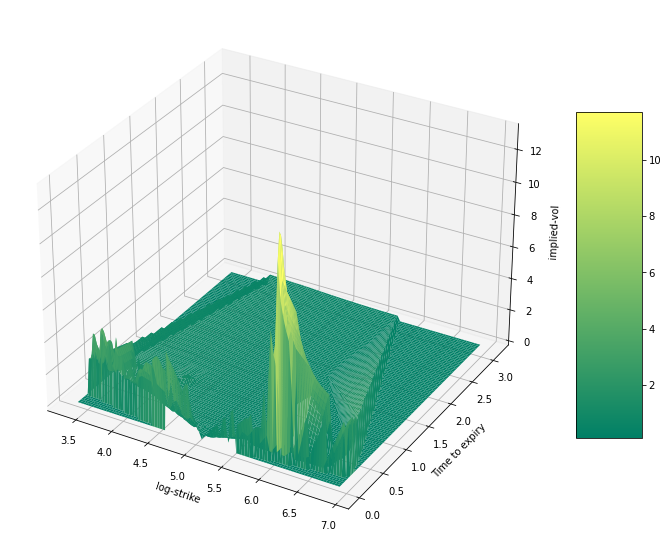

In [118]:
now = datetime.now()
exprys =pd.to_datetime(calls['expry'], format='%Y-%m-%d')
maturity = exprys-now

Xc = np.log(calls['strike'])
Yc = [(items.days+2)/250 for items in maturity]
Zc = calls['impliedVolatility']

XXc, YYc, ZZc = make_surf(Xc, Yc, Zc)
fig = plt.figure(figsize = (12,12))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(XXc,YYc,ZZc, cmap=cm.summer, vmin=0.1,
                linewidth=0.0, antialiased = True, rcount=500, ccount=500, color='white')
ax.set_xlabel("log-strike")
ax.set_ylabel("Time to expiry")
ax.set_zlabel("implied-vol")
fig.colorbar(surf, shrink=0.5, aspect=5);

# B. The surface for Apple Put

/var/folders/d0/6cymk_pn0yl4bjbhkblw54bh0000gn/T/ipykernel_92924/1313244575.py:11: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


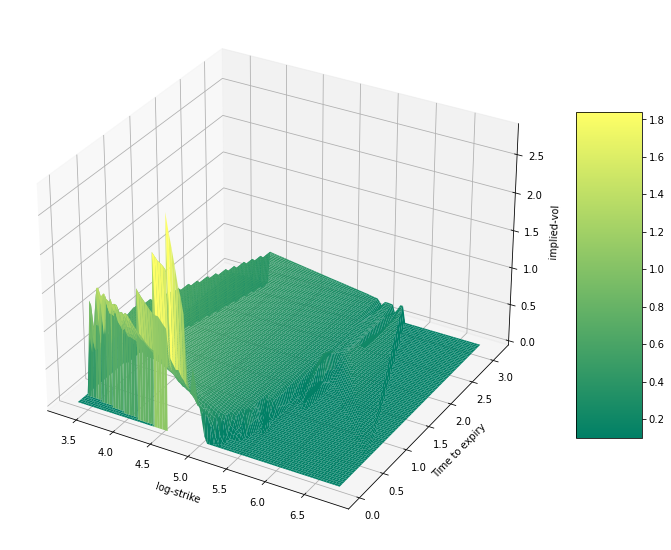

In [184]:
now = datetime.now()
exprys =pd.to_datetime(puts['expry'], format='%Y-%m-%d')
maturity = exprys-now

Xp = np.log(puts['strike'])
Yp = [(items.days+2)/250 for items in maturity]
Zp = puts['impliedVolatility']

XXp, YYp, ZZp = make_surf(Xp, Yp, Zp)
fig = plt.figure(figsize = (12,12))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(XXp,YYp,ZZp, cmap=cm.summer, vmin=0.1,
                linewidth=0.0, antialiased = True, rcount=500, ccount=500, color='white')
ax.set_xlabel("log-strike")
ax.set_ylabel("Time to expiry")
ax.set_zlabel("implied-vol")
fig.colorbar(surf, shrink=0.5, aspect=5);

# C. Smooth surface for Apple Put

Apply SmoothBivariateSpline interpolation to make the implied volatility smoother

In [214]:
import scipy.interpolate
interp_func = scipy.interpolate.SmoothBivariateSpline(XXp.flatten(), YYp.flatten(), ZZp.flatten(), s=0.0)

/opt/anaconda3/lib/python3.9/site-packages/scipy/interpolate/fitpack2.py:1176: UserWarning: ier=1036
  warnings.warn(message)


In [215]:
nn = len(XXp)
ZZp = np.zeros((nn,nn))
for i in range(nn):
    for j in range(nn):
        ZZp[i,j] =interp_func(XXp[i,j],YYp[i,j])    

/var/folders/d0/6cymk_pn0yl4bjbhkblw54bh0000gn/T/ipykernel_92924/80487620.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


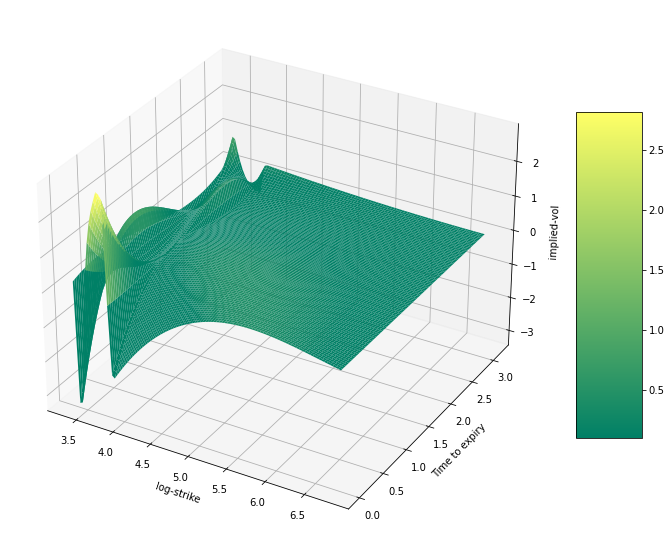

In [216]:
fig = plt.figure(figsize = (12,12))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(XXp,YYp,ZZp, cmap=cm.summer, vmin=0.1,
                linewidth=0.0, antialiased = True, rcount=500, ccount=500, color='white')
ax.set_xlabel("log-strike")
ax.set_ylabel("Time to expiry")
ax.set_zlabel("implied-vol")
fig.colorbar(surf, shrink=0.5, aspect=5);